In [ ]:
import os 
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from block_matching_utils import find_template_pixel, global_template_search, find_new_template_center_NCC
from PIL import Image
from dataLoader import prepare_input_img
import matplotlib.pyplot as plt

In [9]:
data_dir = '/Volumes/MelanieDisk/CLUST_Data'
runs = '/Volumes/MelanieDisk/CLUST_Runs'
exp = 'exp_80_50_128_se60'

In [10]:
exp_dir = os.path.join(runs, exp)

In [11]:
img = os.path.join(data_dir, 'ICR-03', 'Data', '00001.png')

In [21]:
img_ar = np.asarray(Image.open(img))

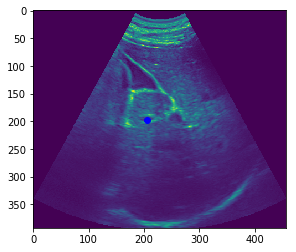

In [30]:
% matplotlib inline
plt.imshow(img_ar)
plt.scatter(206, 197, color='b')

In [34]:
img_ar2 = imresize(img_ar, (int(np.floor(img_ar.shape[0]*0.42/0.3)),int(np.floor(img_ar.shape[1]*0.55/0.3)) ))

/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


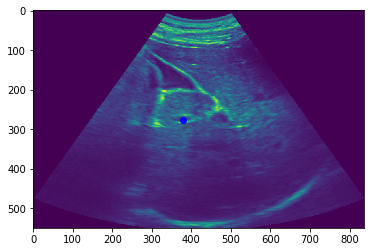

In [37]:
plt.imshow(img_ar2)
plt.scatter(206*0.55/0.3, 197*0.42/0.3, color='b')

/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """
/Applications/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


0.9300462010883213


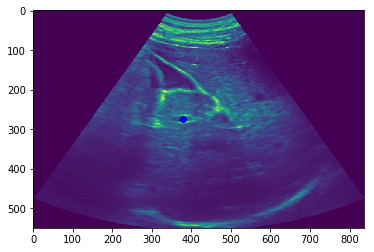

0.9375017327960204


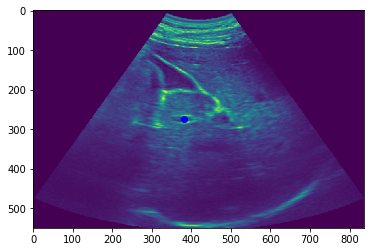

0.9431763971533782


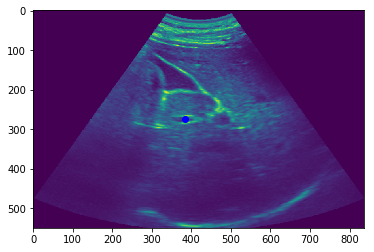

0.9566799792990365


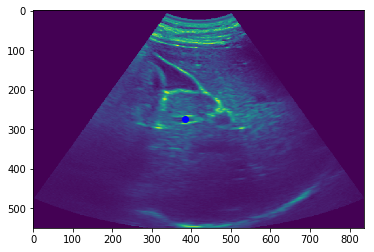

In [42]:
list_i = ['00001.png', '00002.png', '00003.png', '00004.png', '00005.png']
name1 = list_i[0]
img = os.path.join(data_dir, 'ICR-03', 'Data', name1)
img_ar = np.asarray(Image.open(img))
im2 = imresize(img_ar, (int(np.floor(img_ar.shape[0]*0.42/0.3)),int(np.floor(img_ar.shape[1]*0.55/0.3))))
c1, c2 = 206*0.55/0.3, 197*0.42/0.3
for i in range(1,5):
    im1 = im2
    name1 = list_i[i]
    img = os.path.join(data_dir, 'ICR-03', 'Data', name1)
    img_ar = np.asarray(Image.open(img))
    im2 = imresize(img_ar, (int(np.floor(img_ar.shape[0]*0.42/0.3)),int(np.floor(img_ar.shape[1]*0.55/0.3))))
    c1, c2, maxNCC = find_new_template_center_NCC(c1, c2, im1, im2, width=80)
    print(maxNCC)
    plt.imshow(im2)
    plt.scatter(c1,c2, color='b')
    plt.show()